In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sc.constants as cs
from sc import payoff as po
from yq.scripts import simulation as yqsm

print(pd.__version__)

2.1.3


In [2]:
paths_arr = yqsm.read_sim_data('gbm', '20231111_195045_022812', pd.Timestamp('2023-08-09'), pd.Timestamp('2023-08-15'))
print(paths_arr)

Total sims/length of sim_data_df for 2023-08-09 00:00:00: 100
Total sims/length of sim_data_df for 2023-08-10 00:00:00: 100
Total sims/length of sim_data_df for 2023-08-11 00:00:00: 100
Total sims/length of sim_data_df for 2023-08-14 00:00:00: 100
Total sims/length of sim_data_df for 2023-08-15 00:00:00: 100
Total days is: 5

[[               LONN.SW     SIKA.SW
Date                              
2023-08-10  495.071653  275.078187
2023-08-11  491.667070  270.557708
2023-08-14  482.259156  273.067201
2023-08-15  487.483163  274.634728
2023-08-16  500.038604  277.364954
...                ...         ...
2024-07-24  416.334894  234.760395
2024-07-25  429.965714  241.369146
2024-07-26  430.300003  247.062289
2024-07-29  430.034470  245.947811
2024-07-30  433.517181  248.589679

[244 rows x 2 columns],                LONN.SW     SIKA.SW
Date                              
2023-08-10  496.965704  270.300931
2023-08-11  518.324371  274.902184
2023-08-14  528.148904  276.545857
2023-08-15  525

In [3]:
#prep for single price path

df_sim = paths_arr[1][1]
df_sim = df_sim.rename(columns={'LONN.SW': 'LONN.SE', 'SIKA.SW': 'SIKA.SE'})

In [4]:
#po.pricing_single(df_sim)
first_sim_date = df_sim.first_valid_index()
df_historical = po.get_historical_assets(first_sim_date, cs.INITIAL_FIXING_DATE)
barrierHit = po.checkBarrier(df_historical)
df_payouts = po.payouts(df_sim, barrierHit)
price = po.rnv(df_payouts, df_historical.index[-1])
po.payouts(df_sim, False)

,Payout
Date,
2023-11-06,20.0
2024-02-05,20.0
2024-02-05,1000.0


Total sims/length of sim_data_df for 2023-08-09 00:00:00: 100
Total sims/length of sim_data_df for 2023-08-10 00:00:00: 100
Total sims/length of sim_data_df for 2023-08-11 00:00:00: 100
Total sims/length of sim_data_df for 2023-08-14 00:00:00: 100
Total sims/length of sim_data_df for 2023-08-15 00:00:00: 100
Total days is: 5



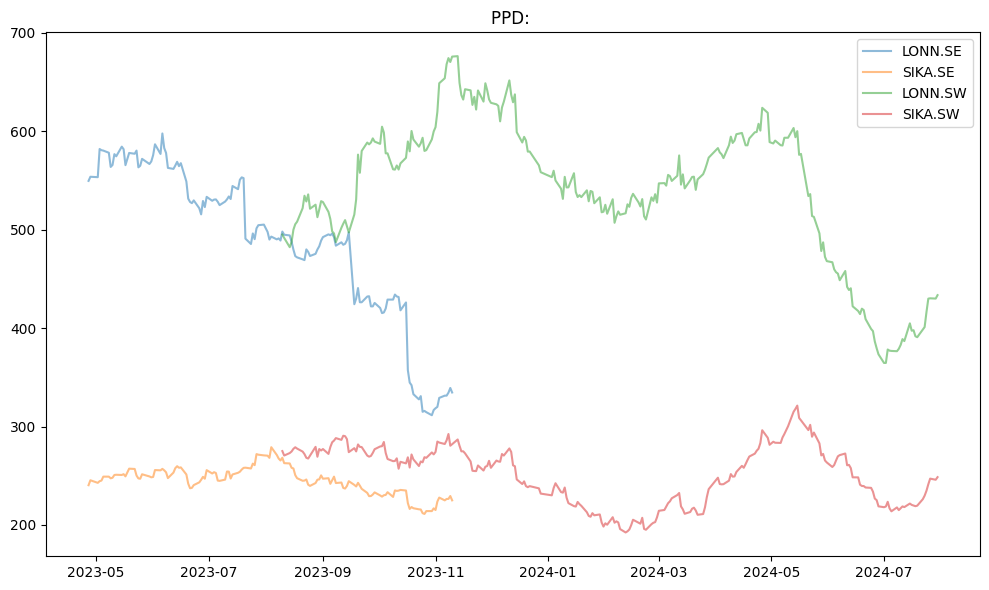

In [5]:
# from pathlib import Path
# from yq.utils import path as yq_path
# import os
# paths_arr = yqsm.read_sim_data('gbm', '20231111_195045_022812', pd.Timestamp('2023-08-09'), pd.Timestamp('2023-08-15'))
# df_sim = paths_arr[0][0]

# fig, ax = plt.subplots(figsize=(10,6))

# hist_data = po.get_historical_assets_all()
# hist_df = hist_data[(hist_data.index >= cs.INITIAL_FIXING_DATE) 
#                            & (hist_data.index <= cs.FINAL_FIXING_DATE)]
# for asset in cs.ASSET_NAMES:
#     ax.plot(hist_df.index, hist_df[asset], alpha=0.5, label=asset)
# for col in df_sim.columns:
#     ax.plot(df_sim.index, df_sim[col], alpha=0.5, label=col)


# title_str = f"PPD: "
# plt.title(title_str)
# plt.legend(loc='upper right')
# plt.tight_layout()
# stor_dir = yq_path.get_plots_path(Path(os.getcwd()).parent)                     
# stor_dir.mkdir(parents=True, exist_ok=True)
# file_path = stor_dir.joinpath(f'test.png')
# plt.savefig(file_path, bbox_inches='tight')

In [6]:
df_plot = df_sim.copy(deep = True)
for asset in cs.ASSET_NAMES:
    df_plot[asset] = df_plot[asset] / cs.INITIAL_LEVELS[asset]
plt.figure(figsize = (15, 8))
plt.plot(df_plot)
plt.axhline(y=1, c = "black", alpha = 0.5)
plt.axhline(y = 0.6, c = "red", alpha = 0.5)
plt.axvline(x = cs.FINAL_FIXING_DATE, c = "darkgreen")
for date in cs.EARLY_REDEMPTION_OBSERVATION_DATES:
    plt.axvline(x = date, c = "green", alpha = 0.5)

KeyError: 'LONN.SE'

In [7]:
#multi path testing
df_sim_array = paths_arr[1]
print(df_sim_array[1])
for i in range(len(df_sim_array)):
    df_sim_array[i] = df_sim_array[i].rename(columns={'LONN.SW': 'LONN.SE', 'SIKA.SW': 'SIKA.SE'})


               LONN.SW     SIKA.SW
Date                              
2023-08-11  497.406187  262.778244
2023-08-14  487.977122  260.973142
2023-08-15  487.620680  256.978711
2023-08-16  485.331815  261.598729
2023-08-17  478.079893  264.146840
...                ...         ...
2024-07-24  801.267022  362.617305
2024-07-25  816.255134  361.264379
2024-07-26  819.029965  355.109383
2024-07-29  817.262709  361.408799
2024-07-30  824.291455  366.387528

[243 rows x 2 columns]


In [8]:
po.pricing_multiple(df_sim_array)

[1080.0,
 1040.0,
 259.8629386474726,
 332.26378411701285,
 1020.0,
 1080.0,
 1020.0,
 1080.0,
 1020.0,
 1080.0,
 209.379558559806,
 1060.0,
 1040.0,
 1020.0,
 262.4730119929497,
 1020.0,
 1080.0,
 1080.0,
 1080.0,
 1040.0,
 1080.0,
 1040.0,
 1040.0,
 1020.0,
 1080.0,
 1080.0,
 1040.0,
 1080.0,
 1040.0,
 1080.0,
 330.63114274687905,
 1060.0,
 1060.0,
 1060.0,
 1080.0,
 1080.0,
 1020.0,
 1040.0,
 335.0695655272077,
 1080.0,
 338.45550560418604,
 1080.0,
 298.23339838176355,
 1020.0,
 1080.0,
 1020.0,
 1080.0,
 1020.0,
 1020.0,
 1060.0,
 1020.0,
 323.1553211930887,
 1080.0,
 1080.0,
 254.65529692994303,
 1080.0,
 545.7804795865284,
 1020.0,
 205.56086628643874,
 1080.0,
 1060.0,
 1020.0,
 1020.0,
 1040.0,
 1080.0,
 1040.0,
 1020.0,
 1080.0,
 1080.0,
 1040.0,
 1040.0,
 1080.0,
 1080.0,
 1080.0,
 1080.0,
 1080.0,
 1020.0,
 1020.0,
 1020.0,
 1020.0,
 1080.0,
 307.7783936158131,
 1040.0,
 1080.0,
 1060.0,
 1060.0,
 206.7506401880671,
 1040.0,
 1060.0,
 314.5420351967332,
 235.97434051522748,

In [15]:
paths_arr[1] == df_sim_array

True

In [18]:
df_sim_array[0].first_valid_index()

Timestamp('2023-08-11 00:00:00')

In [22]:
paths_arr[0]

[               LONN.SW     SIKA.SW
 Date                              
 2023-08-10  495.071653  275.078187
 2023-08-11  491.667070  270.557708
 2023-08-14  482.259156  273.067201
 2023-08-15  487.483163  274.634728
 2023-08-16  500.038604  277.364954
 ...                ...         ...
 2024-07-24  416.334894  234.760395
 2024-07-25  429.965714  241.369146
 2024-07-26  430.300003  247.062289
 2024-07-29  430.034470  245.947811
 2024-07-30  433.517181  248.589679
 
 [244 rows x 2 columns],
                LONN.SW     SIKA.SW
 Date                              
 2023-08-10  496.965704  270.300931
 2023-08-11  518.324371  274.902184
 2023-08-14  528.148904  276.545857
 2023-08-15  525.098710  266.829608
 2023-08-16  525.354991  268.892288
 ...                ...         ...
 2024-07-24  670.382737  327.147389
 2024-07-25  644.435036  313.472373
 2024-07-26  643.190722  319.286648
 2024-07-29  626.693345  313.666126
 2024-07-30  635.882258  323.774162
 
 [244 rows x 2 columns],
          

In [21]:
po.pricing_multiple(paths_arr[0])

KeyError: 'LONN.SE'

In [19]:
po.pricing_multiple(paths_arr[1])

[1080.0,
 1040.0,
 259.8629386474726,
 332.26378411701285,
 1020.0,
 1080.0,
 1020.0,
 1080.0,
 1020.0,
 1080.0,
 209.379558559806,
 1060.0,
 1040.0,
 1020.0,
 262.4730119929497,
 1020.0,
 1080.0,
 1080.0,
 1080.0,
 1040.0,
 1080.0,
 1040.0,
 1040.0,
 1020.0,
 1080.0,
 1080.0,
 1040.0,
 1080.0,
 1040.0,
 1080.0,
 330.63114274687905,
 1060.0,
 1060.0,
 1060.0,
 1080.0,
 1080.0,
 1020.0,
 1040.0,
 335.0695655272077,
 1080.0,
 338.45550560418604,
 1080.0,
 298.23339838176355,
 1020.0,
 1080.0,
 1020.0,
 1080.0,
 1020.0,
 1020.0,
 1060.0,
 1020.0,
 323.1553211930887,
 1080.0,
 1080.0,
 254.65529692994303,
 1080.0,
 545.7804795865284,
 1020.0,
 205.56086628643874,
 1080.0,
 1060.0,
 1020.0,
 1020.0,
 1040.0,
 1080.0,
 1040.0,
 1020.0,
 1080.0,
 1080.0,
 1040.0,
 1040.0,
 1080.0,
 1080.0,
 1080.0,
 1080.0,
 1080.0,
 1020.0,
 1020.0,
 1020.0,
 1020.0,
 1080.0,
 307.7783936158131,
 1040.0,
 1080.0,
 1060.0,
 1060.0,
 206.7506401880671,
 1040.0,
 1060.0,
 314.5420351967332,
 235.97434051522748,

In [12]:
# Feel free to delete, just some testing (yq)

df_sim_array



[               LONN.SE     SIKA.SE
 Date                              
 2023-08-11  499.011317  268.851771
 2023-08-14  515.875621  275.900323
 2023-08-15  527.669200  284.822115
 2023-08-16  522.334687  284.395135
 2023-08-17  517.631400  282.277199
 ...                ...         ...
 2024-07-24  475.101997  332.051222
 2024-07-25  479.061595  341.343588
 2024-07-26  474.737273  345.458681
 2024-07-29  466.689542  348.860552
 2024-07-30  462.361023  348.674853
 
 [243 rows x 2 columns],
                LONN.SE     SIKA.SE
 Date                              
 2023-08-11  497.406187  262.778244
 2023-08-14  487.977122  260.973142
 2023-08-15  487.620680  256.978711
 2023-08-16  485.331815  261.598729
 2023-08-17  478.079893  264.146840
 ...                ...         ...
 2024-07-24  801.267022  362.617305
 2024-07-25  816.255134  361.264379
 2024-07-26  819.029965  355.109383
 2024-07-29  817.262709  361.408799
 2024-07-30  824.291455  366.387528
 
 [243 rows x 2 columns],
          